# Design Parameters for Figure-Eight Motion via Five-Bar, Geared Linkage

In [1]:
import sympy as s
import numpy as n
import matplotlib
import matplotlib.pyplot as p
import matplotlib.animation as animation
from matplotlib.collections import LineCollection
from IPython.display import display

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)

s.init_printing()

In [2]:
t, w, q = s.symbols('t, w, q', real=True)
r1, r2, l1, l2, l3, l4 = s.symbols('r1, r2, l1, l2, l3, l4', positive=True)
a1 = w*t
a2 = -r1/r2*a1 + q

In [3]:
A = l1*s.Matrix([s.cos(a1), s.sin(a1)])
B = l2*s.Matrix([s.cos(a2), s.sin(a2)]) + s.Matrix([r1+r2,0])
AB = B - A
L = AB.norm()
a3 = s.acos((l3**2-l4**2+L**2)/(2*L*l3)) + s.atan2(AB[1],AB[0])
C = A + l3*s.Matrix([s.cos(a3), s.sin(a3)])

In [4]:
dC = C.diff(t).doit()
speed = dC.norm()

In [5]:
R1 = 2.
R2 = 2.
L1 = 2.
L2 = 2.8
L3 = 9.
L4 = 9.5
Q  = s.pi/8
W  = 1.

In [6]:
args = (t,l1,l2,l3,l4,q,w,r1,r2)
params = (L1,L2,L3,L4,Q,W,R1,R2)

A_ = [ai.subs(zip(args,(t,)+params)) for ai in A]
B_ = [bi.subs(zip(args,(t,)+params)) for bi in B]
C_ = [ci.subs(zip(args,(t,)+params)) for ci in C]
speed_ = speed.subs(zip(args,(t,)+params))

A_ = s.lambdify(t,A_,'numpy')
B_ = s.lambdify(t,B_,'numpy')
C_ = s.lambdify(t,C_,'numpy')
speed_ = s.lambdify(t,speed_,'numpy')

N = 200
t_max = 2*n.pi/W*n.max([1, R2/R1])
T = n.linspace(0,t_max,N)

In [7]:
path = C_(T)
speed_T = speed_(T)

points = n.array([path[0],path[1]]).transpose().reshape(-1,1,2)
segs = n.concatenate([points[:-1],points[1:]],axis=1)
lc = LineCollection(segs, cmap=p.get_cmap('jet'))
lc.set_array(speed_T) # color the segments by our parameter
lc.set_clim((0, n.max(speed_T)))
gears = [p.Circle((0,0),R1,color='c'),p.Circle((R1+R2,0),R2,color='m')]

In [8]:
def my_plot(t):
    
    a = A_(t)
    b = B_(t)
    c = C_(t)
    
    fig = p.figure()
    ax = p.axes(aspect='equal')
    p.title('Path of 5 Linkage Assembly')

    ax.add_collection(lc)
    p.colorbar(lc, orientation='horizontal');
    
    ax.add_artist(gears[0])
    ax.add_artist(gears[1])

    ax.plot([0,a[0],c[0],b[0],R1+R2],[0,a[1],c[1],b[1],0],'bo-');

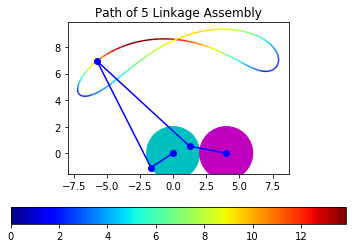

In [9]:
my_plot(10)